In [23]:
import pandas as pd

# docs = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))['data']
# print(len(docs))
data_1 = pd.read_csv('./data_test/vnexpress-p1-12092023.csv')
baomoi = pd.read_csv('./data_test/baomoi12092023.csv')
data_2 = pd.read_csv('./data_test/data.csv')
data_3 = pd.read_csv('./data_test/2023-09-18-17-31-13_9GLZYsdwHJ_vnexpress.net.csv')
data_4 = pd.read_csv('./data_test/2023-09-19-11-27-57_zwqWUccPpj_vnexpress.net.csv')
data_5 = pd.read_csv('./data_test/2023-09-19-14-40-54_iQexLTB60F_vnexpress.net.csv')

papers = pd.concat([data_1, data_2,data_3,data_4,data_5, baomoi], ignore_index=True)

papers = papers.drop(columns=['description'], axis=1)
papers.rename(columns={'body': 'paper_text'}, inplace=True)
# convert type of column
papers['paper_text'] = papers['paper_text'].astype(str)
# Print head
print(papers.head())
print(papers.shape)

                                               title  \
0  Phi hành gia Mỹ lập kỷ lục ở lâu nhất trong vũ...   
1  'Ăn trong chánh niệm' giúp mẹ bỉm giảm 18 kg -...   
2  Truyền thông thế giới thán phục cơ thủ Bao Phư...   
3  Hai thanh niên đánh tài xế cướp tài sản - VnEx...   
4  Bán xe VinFast Fadil bản tiêu chuẩn 2021? - Vn...   

                                          paper_text  
0  Rubio sinh sống và làm việc trên Trạm Vũ trụ Q...  
1  Hoài Thanh hiện làm công việc kinh doanh tại K...  
2  Trang tin chuyên về billiards Kozoom giật tít:...  
3                                                nan  
4  Tối muốn bán xe VinFast Fadil bản tiêu chuẩn 2...  
(397, 2)


In [24]:

# Remove the columns
try:
    papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
except:
    pass

# Print out the first rows of papers
print(papers.head())

                                               title  \
0  Phi hành gia Mỹ lập kỷ lục ở lâu nhất trong vũ...   
1  'Ăn trong chánh niệm' giúp mẹ bỉm giảm 18 kg -...   
2  Truyền thông thế giới thán phục cơ thủ Bao Phư...   
3  Hai thanh niên đánh tài xế cướp tài sản - VnEx...   
4  Bán xe VinFast Fadil bản tiêu chuẩn 2021? - Vn...   

                                          paper_text  
0  Rubio sinh sống và làm việc trên Trạm Vũ trụ Q...  
1  Hoài Thanh hiện làm công việc kinh doanh tại K...  
2  Trang tin chuyên về billiards Kozoom giật tít:...  
3                                                nan  
4  Tối muốn bán xe VinFast Fadil bản tiêu chuẩn 2...  


In [25]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

0    rubio sinh sống và làm việc trên trạm vũ trụ q...
1    hoài thanh hiện làm công việc kinh doanh tại k...
2    trang tin chuyên về billiards kozoom giật tít:...
3                                                  nan
4    tối muốn bán xe vinfast fadil bản tiêu chuẩn 2...
Name: paper_text_processed, dtype: object

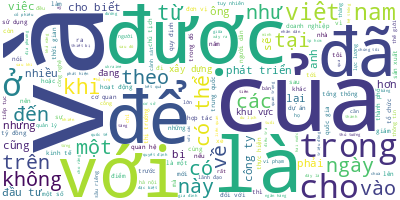

In [26]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [27]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode
import string
import re
import pyvi
from pyvi import ViTokenizer, ViPosTagger
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words = set(open("./data_test/vietnamese-stopwords-dash.txt", "r", encoding="utf-8").read().splitlines())

def remove_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

def remove_number(text):
    return re.sub(r'\d+', '', text).strip()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_punctuation_not_underscore(text): # remove dấu câu để lại dấu _
    # Tạo một bản sao của string.punctuation và loại bỏ dấu _
    punctuation = string.punctuation.replace("_", "")
    # Sử dụng str.maketrans và translate để loại bỏ dấu câu
    return text.translate(str.maketrans('', '', punctuation))

def remove_(text):
    text = remove_punctuation_not_underscore(text)
    text = remove_number(text)
    return re.sub(r'“|”', '', text).strip()
    # return ''.join(char for char in text if char not in ['“', '”'])

def remove_punctuation_underscore(text): # remove dấu _
    punctuation = "_"
    return text.translate(str.maketrans('', '', punctuation))
    
def word_to_phrase(text): # chuyển từ thành cụm từ
    return ViTokenizer.tokenize(text) 

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        # loại bỏ dấu câu and split
        yield([remove_(str(word)) for word in re.findall(r'\w+|\S+', word_to_phrase(remove_punctuation_underscore(str(sentence)))) if remove_(str(word)) != ''])

def remove_stopwords(texts):
    words = [word for word in texts.split() if word not in stop_words]
    words_to_sentence = ' '.join(words)
    return words_to_sentence.strip()

data = papers['paper_text_processed'].apply(lambda x: remove_whitespace(x))
data = data.apply(lambda x: remove_number(x))
data = data.apply(lambda x: remove_punctuation_underscore(x))
data = data.apply(lambda x: word_to_phrase(x))
data = data.apply(lambda x: remove_(x))
data = data.apply(lambda x: remove_stopwords(x))
# text = data[0]
# print(text)
# print(remove_stopwords(text))
docs = data.tolist()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/minhthuy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/minhthuy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
# from sentence_transformers import SentenceTransformer
# sentence_model = SentenceTransformer("keepitreal/vietnamese-sbert")
# embeddings = sentence_model.encode(docs, show_progress_bar=False)

/home/minhthuy/anaconda3/envs/top2vec/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
from top2vec import Top2Vec
model = Top2Vec(docs,speed="learn", workers=8)

2023-09-19 11:28:33,517 - top2vec - INFO - Pre-processing documents for training
2023-09-19 11:28:33,891 - top2vec - INFO - Creating joint document/word embedding
2023-09-19 11:28:37,173 - top2vec - INFO - Creating lower dimension embedding of documents
2023-09-19 11:28:49,802 - top2vec - INFO - Finding dense areas of documents
2023-09-19 11:28:49,826 - top2vec - INFO - Finding topics


In [32]:
print('get num topics: ',model.get_num_topics())

4


### Get Topic Sizes
This will return the number of documents most similar to each topic. Topics are in decreasing order of size.
Returns:
- topic_sizes: The number of documents most similar to each topic.
- topic_nums: The unique index of every topic will be returned.

In [33]:
topic_sizes, topic_nums = model.get_topic_sizes()
print('topic_sizes: ',topic_sizes)
print('topic_nums: ',topic_nums)

topic_sizes:  [202  97  54  44]
topic_nums:  [0 1 2 3]


### Get Topics
This will return the topics in decreasing size.

Returns:
- topic_words: For each topic the top 50 words are returned, in order of semantic similarity to topic.
- word_scores: For each topic the cosine similarity scores of the top 50 words to the topic are returned.
- topic_nums: The unique index of every topic will be returned.



In [39]:
topic_words, word_scores, topic_nums = model.get_topics(1)
print('topic_words: ',topic_words)
print('word_scores: ',word_scores)
print('topic_nums: ',topic_nums)

topic_words:  [['ngoc' 'gia_đinh' 'canh_sat' 'cho' 'nan_nhan' 'tai' 'tru' 'toi' 'chay'
  'hanh_vi' 'cam' 'thanh' 'song' 'khai' 'bo' 'bat' 'bao' 'truong_hop'
  'tu' 'chan' 'đanh' 'đi' 'kiem_tra' 'ta' 'toa' 'giay' 'tre' 'the' 'xay'
  'lo' 'đieu_tra' 'hom' 'hat' 'phuong' 'đuc' 'thay' 'trai' 'phat_hien'
  'đem' 'đia_ban' 'me' 'giao' 'km' 'vu' 'đoi' 'phap_luat' 'cap' 'xe_may'
  'goi' 'noi']]
word_scores:  [[0.8763664  0.8387864  0.81395775 0.8023728  0.8000479  0.79854244
  0.79626894 0.79380804 0.78719795 0.7869379  0.7840881  0.78034943
  0.7757846  0.7726965  0.74616313 0.7382885  0.7360755  0.7346277
  0.73283315 0.72160804 0.72049284 0.70873487 0.7038365  0.6912296
  0.68944544 0.68699604 0.66636646 0.6652605  0.6614893  0.66134465
  0.65707904 0.6469384  0.6459602  0.6457105  0.64503413 0.63966864
  0.6395518  0.6317889  0.6316833  0.6299248  0.6282466  0.62645364
  0.62638783 0.6258487  0.62368023 0.6198926  0.61681306 0.6131837
  0.6070518  0.59962976]]
topic_nums:  [0]


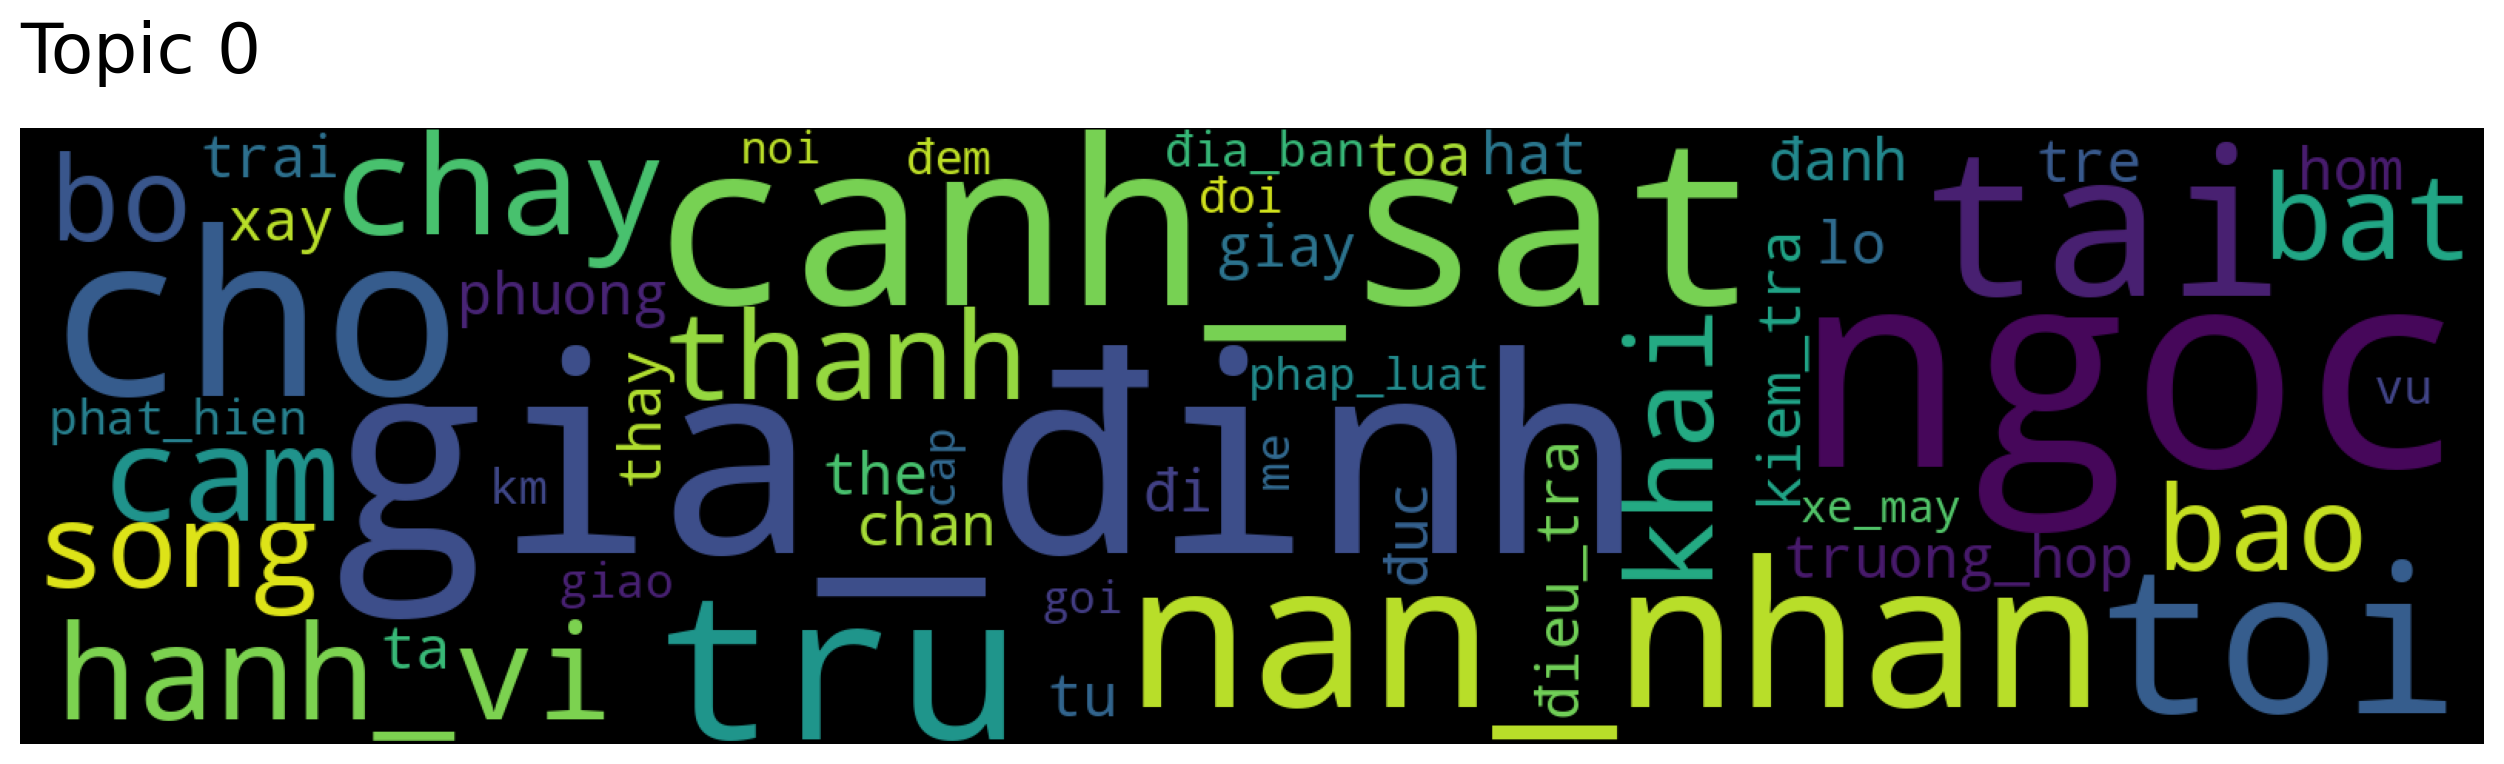

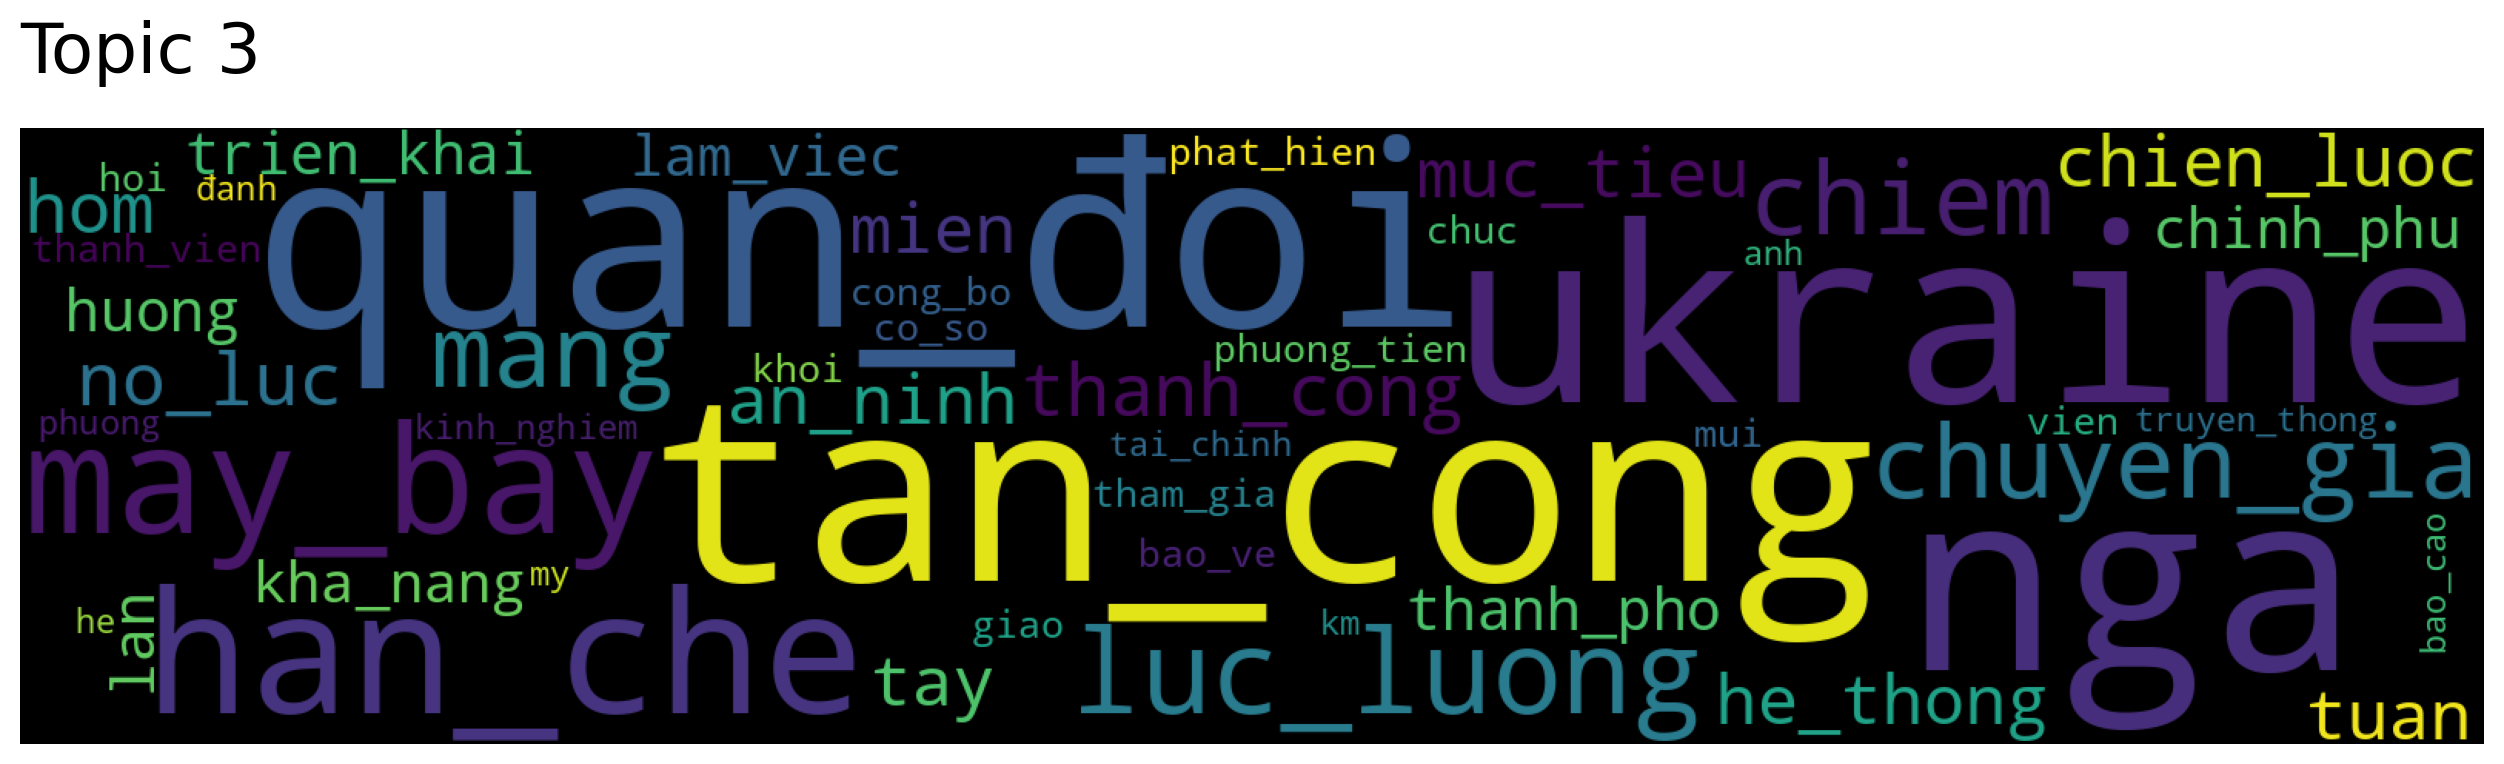

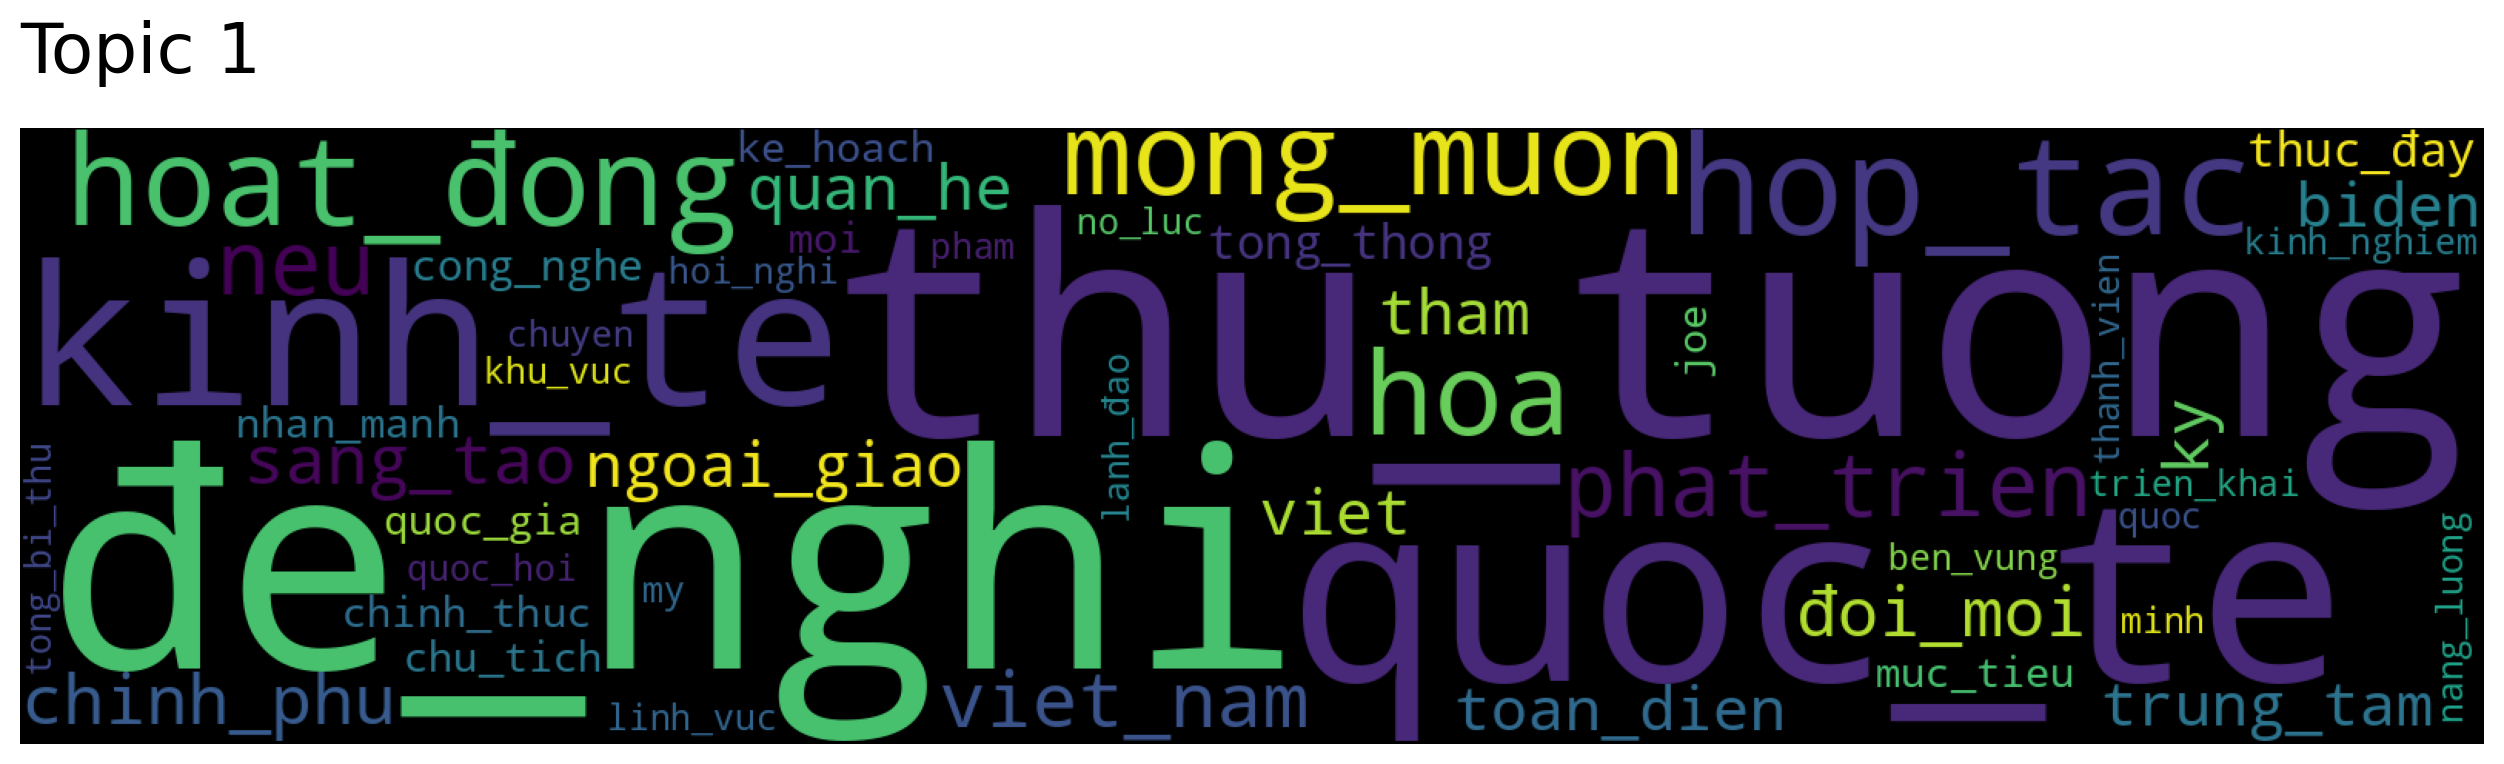

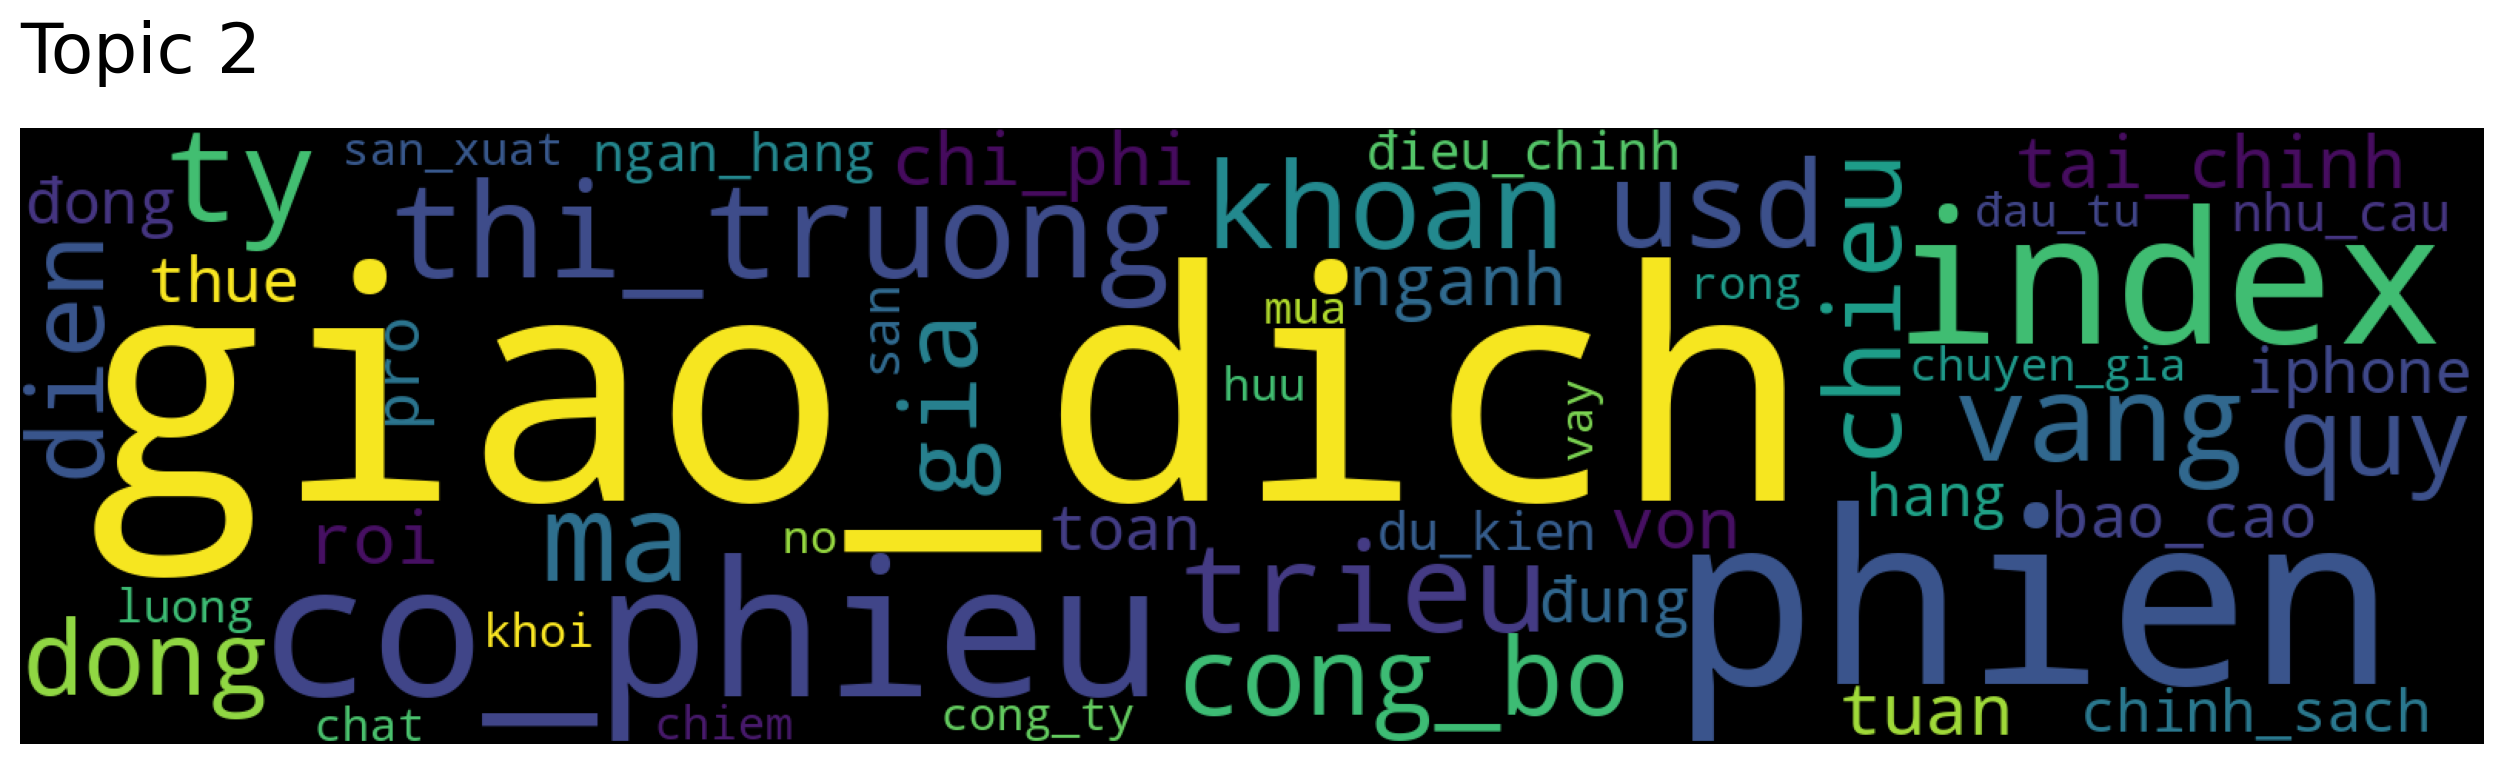

In [40]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["gia_đinh"], num_topics=4)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)